# Discrétisation des variables à des intervalles arbitraires

Dans les recettes précédentes, nous avons vu comment créer des intervalles basés sur des valeurs et une répartition variables. Parfois, cependant, nous voulons diviser les variables en intervalles, dont les limites sont arbitrairement déterminées par l'utilisateur. Dans cette recette, nous allons apprendre à discrétiser une variable en intervalles prédéfinis par l'utilisateur à l'aide de pandas et de l'ensemble de données BostonHouse Prices de scikit-learn

In [2]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

In [3]:
# load the the Boston House price data from Scikit-learn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

# add the target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Traçons un histogramme de la variable LSTAT pour connaître la distribution

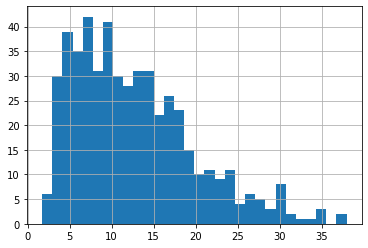

In [4]:
# let's plot a histogram to understand the value range of 
#the variable LSTAT

data['LSTAT'].hist(bins=30)

Les valeurs LSTAT varient de 0 à environ 40

Créons une liste avec les limites d'intervalle arbitraires, en définissant la limite supérieure à l'infini pour accueillir des valeurs plus importantes

In [6]:
# bin boundaries - we will use with pandas cut()
intervals = [0, 10, 20, 30, np.Inf]

# bin labels - we will use with pandas cut()
labels = ['0-10', '10-20', '20-30', '>30']

In [7]:
# discretize LSTAT

# create a discretized version of the variable where the values are the
# strings we created in the previous cell
data['lstat_labels'] = pd.cut(
    data['LSTAT'], bins=intervals, labels=labels, include_lowest=True)

# let's create a version of the discretized variable were the values are
# the interval limits
data['lstat_intervals'] = pd.cut(
    data['LSTAT'], bins=intervals, labels=None, include_lowest=True)

# plot the original and 2 versions of the discretized variable
print(data[['LSTAT', 'lstat_labels', 'lstat_intervals']].head())

   LSTAT lstat_labels lstat_intervals
0   4.98         0-10  (-0.001, 10.0]
1   9.14         0-10  (-0.001, 10.0]
2   4.03         0-10  (-0.001, 10.0]
3   2.94         0-10  (-0.001, 10.0]
4   5.33         0-10  (-0.001, 10.0]


In [8]:
# let's check the number of observations per bin

data['lstat_intervals'].value_counts()

(-0.001, 10.0]    219
(10.0, 20.0]      213
(20.0, 30.0]       62
(30.0, inf]        12
Name: lstat_intervals, dtype: int64

Nous avons trié les valeurs d'une variable dans des intervalles définis par l'utilisateur à l'aide de l'ensemble de données Boston House Prices. Nous avons d'abord tracé un histogramme de la variable LSTAT, pour avoir une idée de la plage de valeurs de la variable. Ensuite, nous avons arbitrairement déterminé et capturé les limites des intervalles dans une liste : nous avons créé des intervalles qui varient de 0 à 10, 10 à 20, 20 à 30 et plus de 30, en définissant la limite supérieure à l'infini avec np.Inf. Ensuite, nous avons créé une liste avec les noms d'intervalle sous forme de chaînes. En utilisant la méthode cut() de pandas et en passant la liste avec les limites d'intervalle, nous avons trié les valeurs des variables dans les bacs prédéfinis. Nous avons exécuté la commande deux fois ; dans la première exécution, nous définissons l'argument labels sur la liste qui contenait les noms d'étiquettes sous forme de chaînes, et dans la seconde exécution, nous définissons l'argument labels sur None. Nous avons capturé la sortie renvoyée dans deux variables, la première affichant les limites d'intervalle en tant que valeurs et la seconde avec des noms d'intervalle en tant que valeurs. Enfin, nous avons compté le nombre d'observations par variable à l'aide de la méthode pandas value_counts().